<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-11/Week%2011/Neural_Networks_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
fpath = "/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week11/Data/nba.csv"
df = pd.read_csv(fpath, index_col="Name")
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# Clean and Split

In [12]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3)

# Scale Data

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define our network structure

In [16]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [20]:
# Sequential model
model = Sequential()

In [23]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape,  # What is the shape of your input features
                activation = "relu"))
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [24]:
# Output layer
model.add(Dense(1,
                activation="sigmoid"))

# Compile our model

In [25]:
# Step 2: Compile
model.compile(loss="bce", optimizer="adam")

# Fit our model

In [27]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data =(X_test, y_test),
                    epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 10ms/step - loss: 0.6270 - val_loss: 0.5899
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6038 - val_loss: 0.5852
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5968 - val_loss: 0.5803
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5871 - val_loss: 0.5802
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5810 - val_loss: 0.5751
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5756 - val_loss: 0.5774
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5715 - val_loss: 0.5735
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5663 - val_loss: 0.5714
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5619 - val_loss: 0.5690
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5588 - val_loss: 0.5694


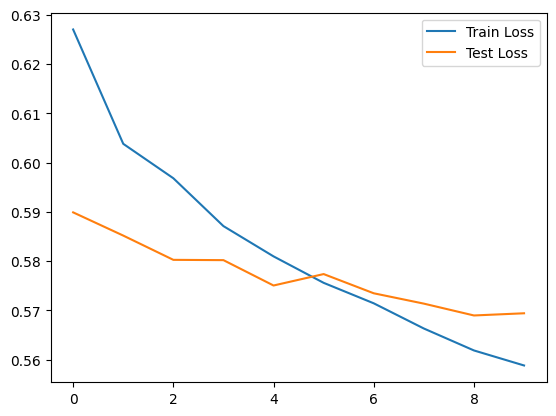

In [28]:
# Visualize the loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.legend();